In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_feather('optimized_alldata.feather')
df.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,playId,nflId,pff_role,...,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,None
1,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,None
2,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,None
3,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,None
4,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,None


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7952692 entries, 0 to 7952691
Data columns (total 70 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   gameId                  int64         
 1   season                  int64         
 2   week                    int64         
 3   gameDate                object        
 4   gameTimeEastern         object        
 5   homeTeamAbbr            object        
 6   visitorTeamAbbr         object        
 7   playId                  int64         
 8   nflId                   int64         
 9   pff_role                object        
 10  pff_positionLinedUp     object        
 11  pff_hit                 float64       
 12  pff_hurry               float64       
 13  pff_sack                float64       
 14  pff_beatenByDefender    float64       
 15  pff_hitAllowed          float64       
 16  pff_hurryAllowed        float64       
 17  pff_sackAllowed         float64       
 18  pf

In [8]:
df.nunique()

gameId               122
season                 1
week                   8
gameDate              24
gameTimeEastern        6
                   ...  
a                   1165
dis                  162
o                  36001
dir                36001
event                 27
Length: 70, dtype: int64

In [9]:
df.iloc[::,60:69]

,team,playDirection,x,y,s,a,dis,o,dir
0,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99
1,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87
2,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55
3,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85
4,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55
...,...,...,...,...,...,...,...,...,...
7952687,BAL,right,37.22,24.69,1.68,0.82,0.17,64.60,76.33
7952688,BAL,right,37.38,24.74,1.67,0.64,0.16,68.26,73.61
7952689,BAL,right,37.53,24.77,1.60,0.69,0.16,73.86,73.56
7952690,BAL,right,37.67,24.80,1.48,1.00,0.15,80.84,75.27


In [11]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing,
                               'datatypes': df.dtypes})
percent_missing

gameId             0.0
season             0.0
week               0.0
gameDate           0.0
gameTimeEastern    0.0
                  ... 
a                  0.0
dis                0.0
o                  0.0
dir                0.0
event              0.0
Length: 70, dtype: float64

In [12]:
percent_missing

gameId             0.0
season             0.0
week               0.0
gameDate           0.0
gameTimeEastern    0.0
                  ... 
a                  0.0
dis                0.0
o                  0.0
dir                0.0
event              0.0
Length: 70, dtype: float64

In [13]:
df['penaltyYards'].unique()

array([ nan,   0., -15.,  21.,   3.,  -5., -10.,  -9.,  31.,   7.,  15.,
         5.,  14., -13.,  13.,   8.,  26.,  10.,  20.,  16.,  12.,   4.,
         6.,  -4.,  45.,  50., -14.,  19.,   2.,  28.,  27., -12.,  -3.,
        11.,  41., -18.,  -8.,  39.,  -6.,  17.,  18.,  43.,  46.,   9.,
         1., -11.,  22.,  32.,  25.,  24.,  23.,  40.,  38.,  -7.,  35.,
        36.,  42.,  47.,  33.,  48.,  -2.])

In [14]:
missing_value_df.head(60)

,column_name,percent_missing,datatypes
gameId,gameId,0.000000,int64
season,season,0.000000,int64
week,week,0.000000,int64
gameDate,gameDate,0.000000,object
gameTimeEastern,gameTimeEastern,0.000000,object
homeTeamAbbr,homeTeamAbbr,0.000000,object
visitorTeamAbbr,visitorTeamAbbr,0.000000,object
playId,playId,0.000000,int64
nflId,nflId,0.000000,int64
pff_role,pff_role,0.000000,object


In [15]:
missing_value_df.tail(11)

,column_name,percent_missing,datatypes
jerseyNumber,jerseyNumber,0.0,float64
team,team,0.0,object
playDirection,playDirection,0.0,category
x,x,0.0,float64
y,y,0.0,float64
s,s,0.0,float64
a,a,0.0,float64
dis,dis,0.0,float64
o,o,0.0,float64
dir,dir,0.0,float64


In [16]:
#needed_columns = []
#for col in df.columns:
    #if (df.isnull().sum() * 100 / len(df)).any() <= float(15):
        #needed_columns.append(col)
        
        
        

In [18]:
df.iloc[::, 0:11]

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,playId,nflId,pff_role,pff_positionLinedUp
0,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,QB
1,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,QB
2,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,QB
3,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,QB
4,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,QB
...,...,...,...,...,...,...,...,...,...,...,...
7952687,2021091300,2021,1,09/13/2021,20:15:00,LV,BAL,4765,47906,Pass Block,LG
7952688,2021091300,2021,1,09/13/2021,20:15:00,LV,BAL,4765,47906,Pass Block,LG
7952689,2021091300,2021,1,09/13/2021,20:15:00,LV,BAL,4765,47906,Pass Block,LG
7952690,2021091300,2021,1,09/13/2021,20:15:00,LV,BAL,4765,47906,Pass Block,LG


In [19]:
newcol = missing_value_df.loc[missing_value_df['percent_missing']<=15, 'column_name']
newcol

gameId                                    gameId
season                                    season
week                                        week
gameDate                                gameDate
gameTimeEastern                  gameTimeEastern
homeTeamAbbr                        homeTeamAbbr
visitorTeamAbbr                  visitorTeamAbbr
playId                                    playId
nflId                                      nflId
pff_role                                pff_role
pff_positionLinedUp          pff_positionLinedUp
height                                    height
weight                                    weight
birthDate                              birthDate
collegeName                          collegeName
officialPosition                officialPosition
displayName                          displayName
playDescription                  playDescription
quarter                                  quarter
down                                        down
yardsToGo           

In [20]:
newcolumns = []
for index, value in newcol.items():
    newcolumns.append(value)


In [21]:
newcolumns

['gameId',
 'season',
 'week',
 'gameDate',
 'gameTimeEastern',
 'homeTeamAbbr',
 'visitorTeamAbbr',
 'playId',
 'nflId',
 'pff_role',
 'pff_positionLinedUp',
 'height',
 'weight',
 'birthDate',
 'collegeName',
 'officialPosition',
 'displayName',
 'playDescription',
 'quarter',
 'down',
 'yardsToGo',
 'possessionTeam',
 'defensiveTeam',
 'yardlineSide',
 'yardlineNumber',
 'gameClock',
 'preSnapHomeScore',
 'preSnapVisitorScore',
 'passResult',
 'prePenaltyPlayResult',
 'playResult',
 'absoluteYardlineNumber',
 'offenseFormation',
 'personnelO',
 'defendersInBox',
 'personnelD',
 'dropBackType',
 'pff_playAction',
 'pff_passCoverage',
 'pff_passCoverageType',
 'frameId',
 'time',
 'jerseyNumber',
 'team',
 'playDirection',
 'x',
 'y',
 's',
 'a',
 'dis',
 'o',
 'dir',
 'event']

In [22]:
dfnew = df.loc[:,newcolumns]

In [23]:
dfnew.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,playId,nflId,pff_role,...,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,None
1,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,None
2,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,None
3,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,None
4,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,None


In [24]:
dfnew.dtypes

gameId                             int64
season                             int64
week                               int64
gameDate                          object
gameTimeEastern                   object
homeTeamAbbr                      object
visitorTeamAbbr                   object
playId                             int64
nflId                              int64
pff_role                          object
pff_positionLinedUp               object
height                            object
weight                             int64
birthDate                         object
collegeName                       object
officialPosition                  object
displayName                       object
playDescription                   object
quarter                            int64
down                               int64
yardsToGo                          int64
possessionTeam                    object
defensiveTeam                     object
yardlineSide                      object
yardlineNumber  

In [25]:
numeric_feature = [col for col in dfnew.columns if dfnew[col].dtype != 'O']
categorical_feature = [col for col in dfnew.columns if dfnew[col].dtype ==
'O']

In [26]:
numeric_feature

['gameId',
 'season',
 'week',
 'playId',
 'nflId',
 'weight',
 'quarter',
 'down',
 'yardsToGo',
 'yardlineNumber',
 'preSnapHomeScore',
 'preSnapVisitorScore',
 'prePenaltyPlayResult',
 'playResult',
 'absoluteYardlineNumber',
 'defendersInBox',
 'pff_playAction',
 'frameId',
 'time',
 'jerseyNumber',
 'playDirection',
 'x',
 'y',
 's',
 'a',
 'dis',
 'o',
 'dir']

In [30]:
numeric_feature.remove('time')

In [31]:
numeric_feature.remove('playDirection')

In [32]:
numeric_feature

['gameId',
 'season',
 'week',
 'playId',
 'nflId',
 'weight',
 'quarter',
 'down',
 'yardsToGo',
 'yardlineNumber',
 'preSnapHomeScore',
 'preSnapVisitorScore',
 'prePenaltyPlayResult',
 'playResult',
 'absoluteYardlineNumber',
 'defendersInBox',
 'pff_playAction',
 'frameId',
 'jerseyNumber',
 'x',
 'y',
 's',
 'a',
 'dis',
 'o',
 'dir']

In [27]:
categorical_feature

['gameDate',
 'gameTimeEastern',
 'homeTeamAbbr',
 'visitorTeamAbbr',
 'pff_role',
 'pff_positionLinedUp',
 'height',
 'birthDate',
 'collegeName',
 'officialPosition',
 'displayName',
 'playDescription',
 'possessionTeam',
 'defensiveTeam',
 'yardlineSide',
 'gameClock',
 'passResult',
 'offenseFormation',
 'personnelO',
 'personnelD',
 'dropBackType',
 'pff_passCoverage',
 'pff_passCoverageType',
 'team',
 'event']

C:\Users\U6049975\AppData\Local\Temp\ipykernel_1200\4073244575.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


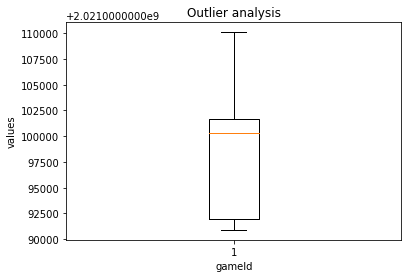

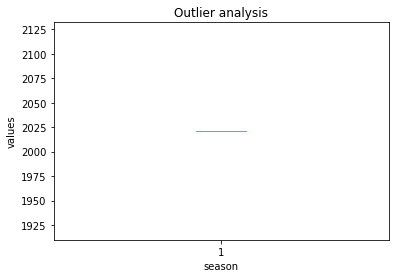

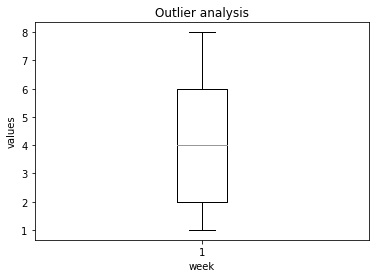

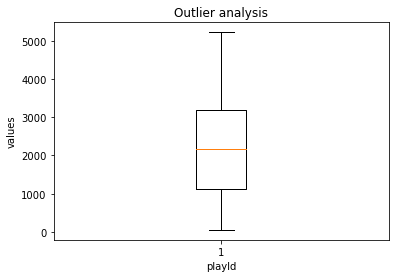

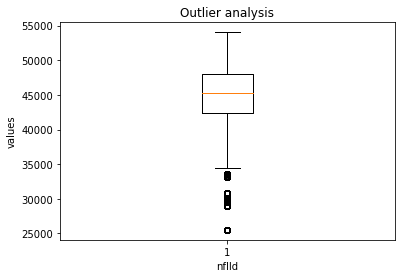

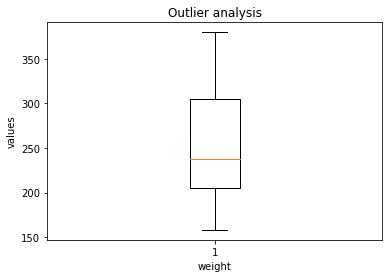

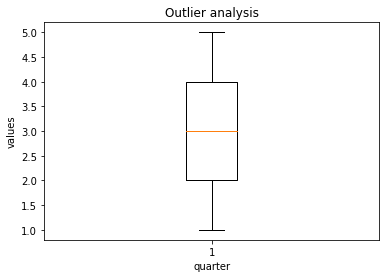

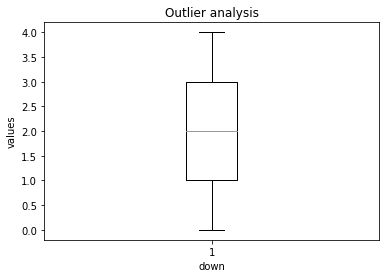

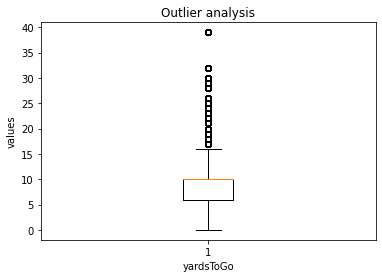

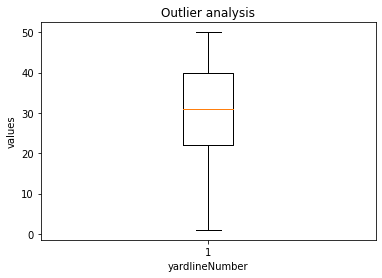

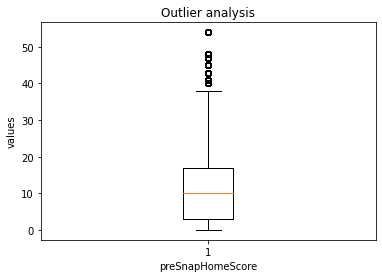

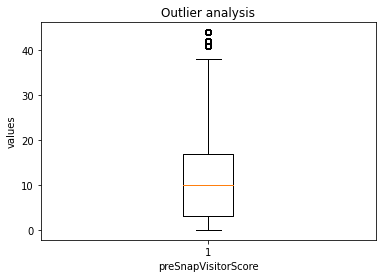

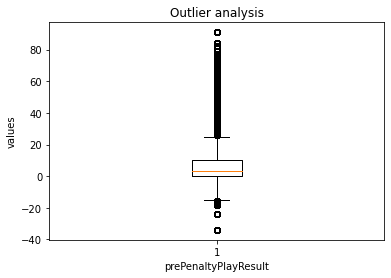

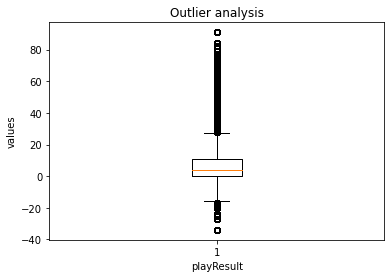

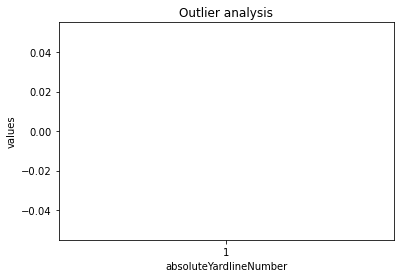

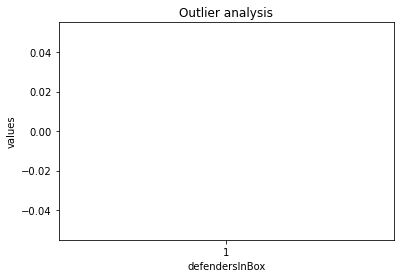

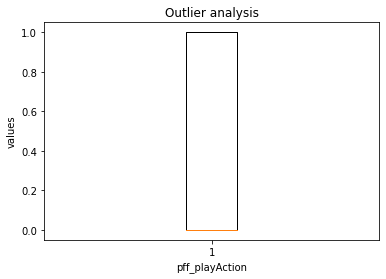

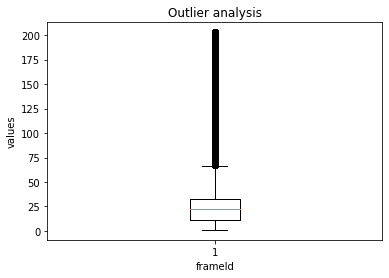

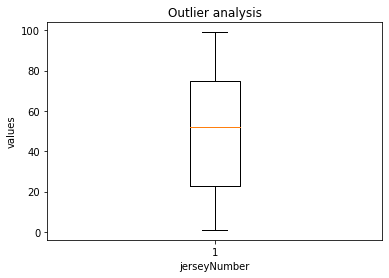

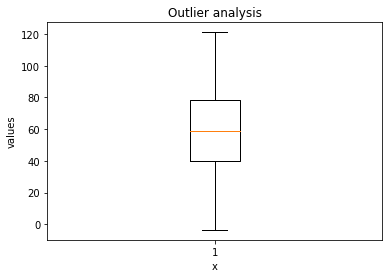

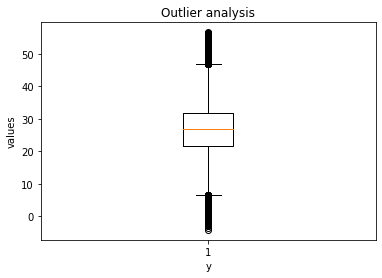

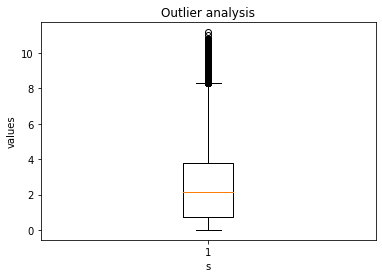

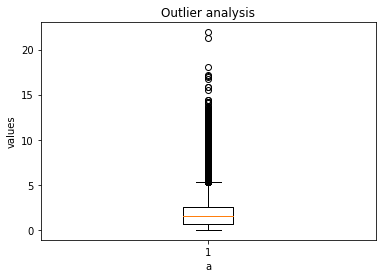

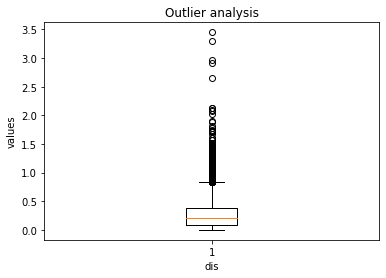

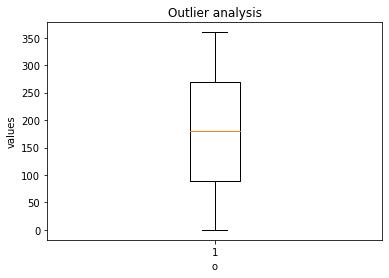

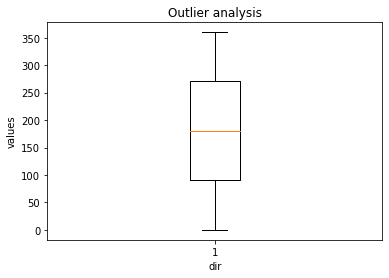

In [33]:
for col in dfnew.columns:
    if col in numeric_feature:
        try:
            fig = plt.figure()
            ax = fig.add_subplot()
            ax.boxplot(dfnew[col])
            ax.set_xlabel(col)
            ax.set_ylabel('values')
            ax.set_title('Outlier analysis')
            plt.savefig(f'box_{col}.png')
        except:
            print(f'Error: box_{col}.png' )

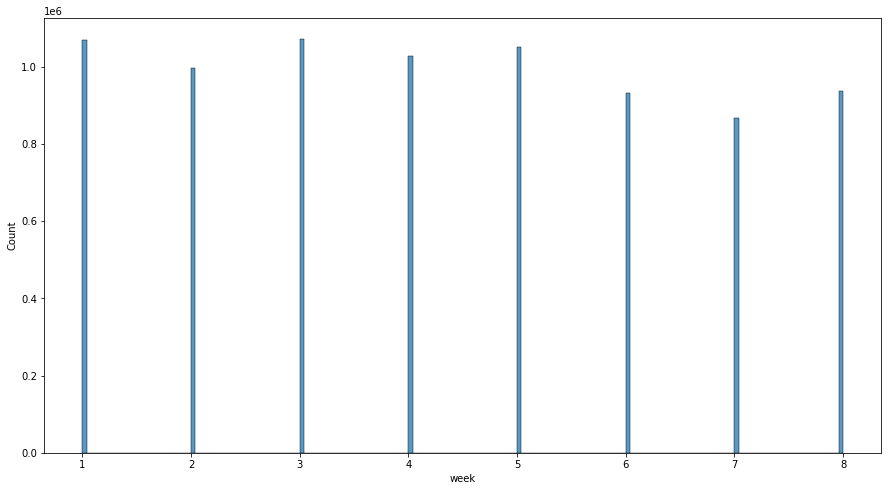

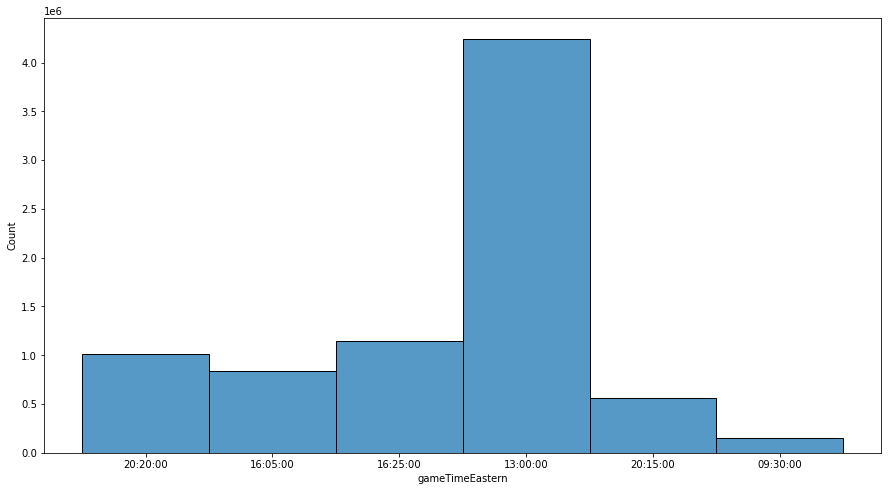

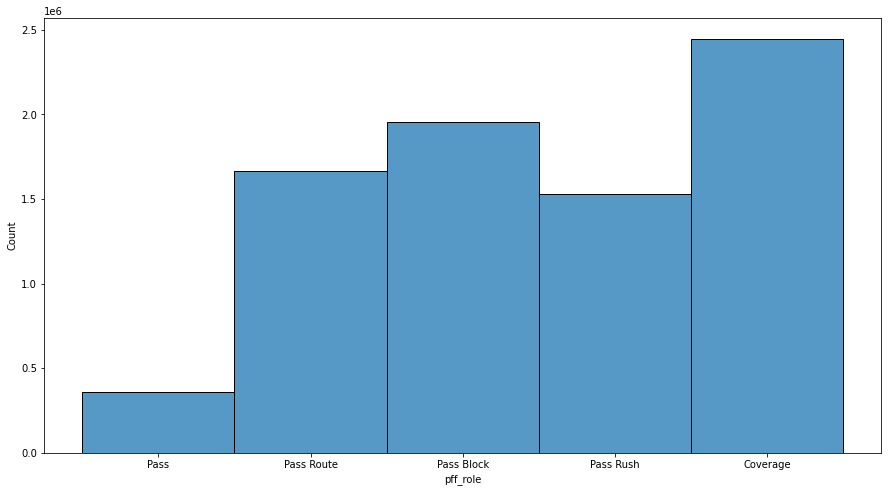

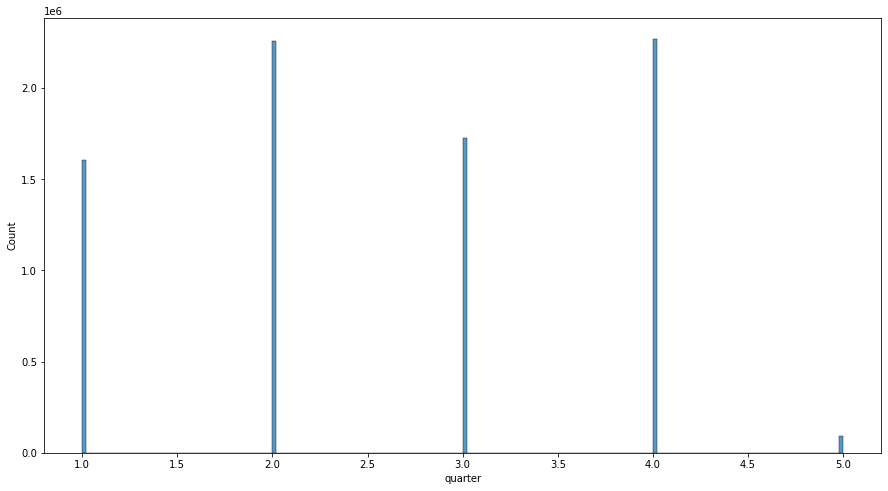

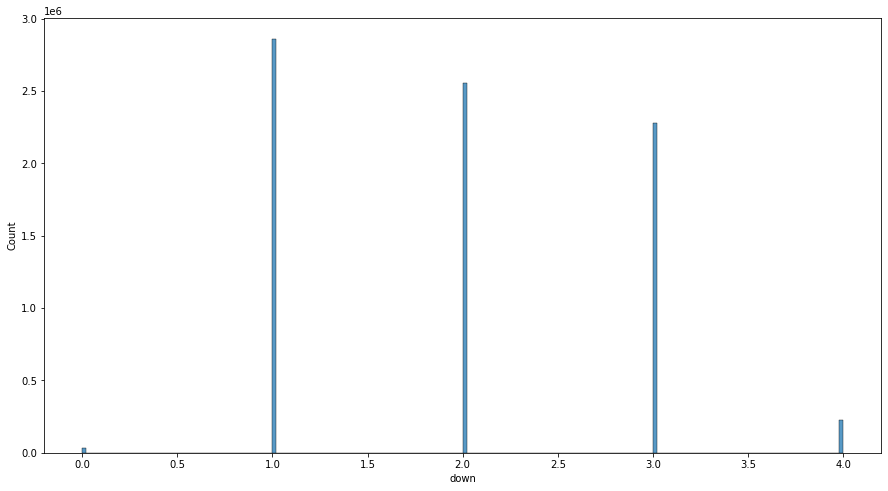

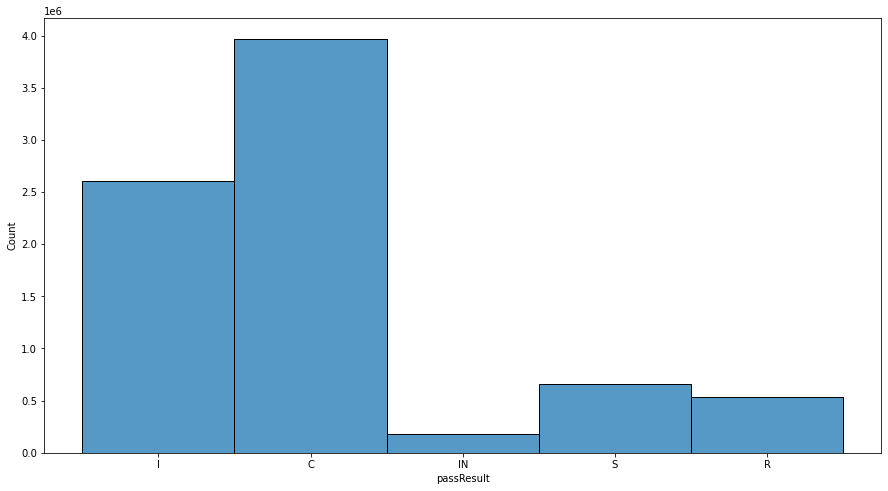

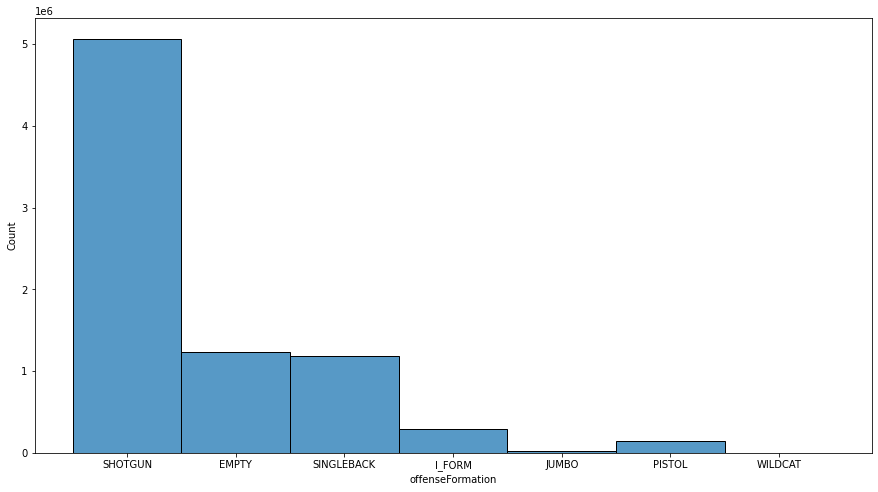

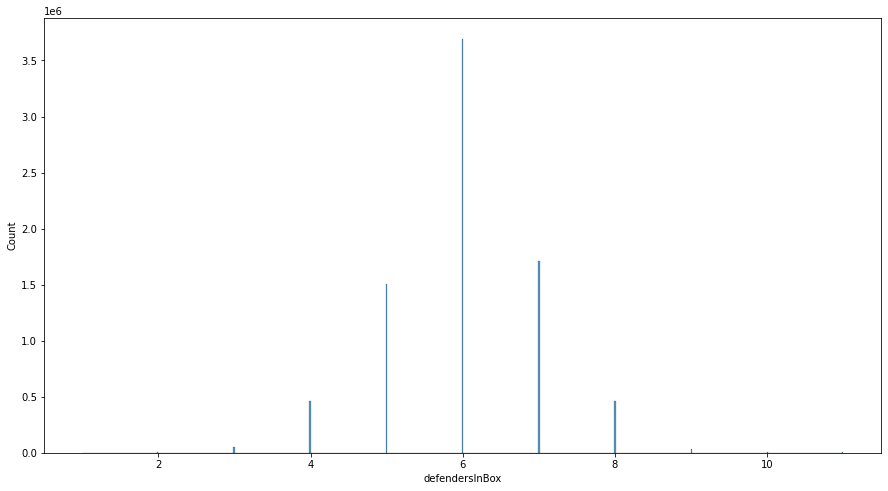

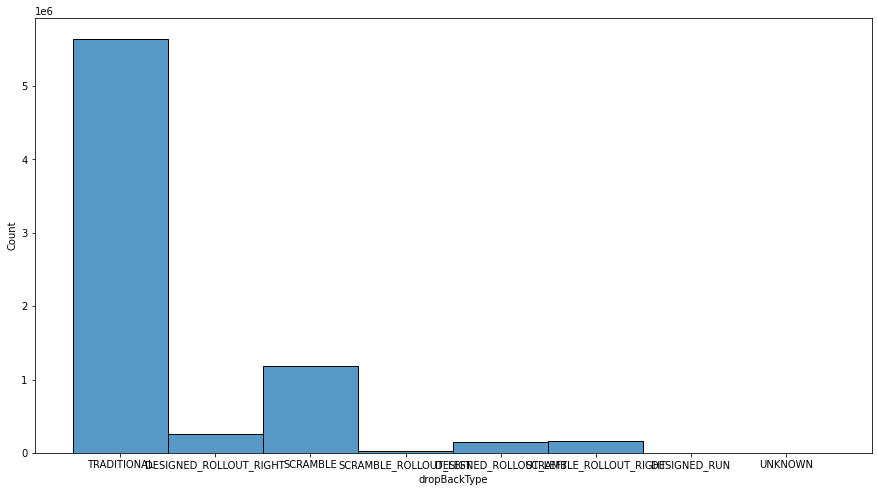

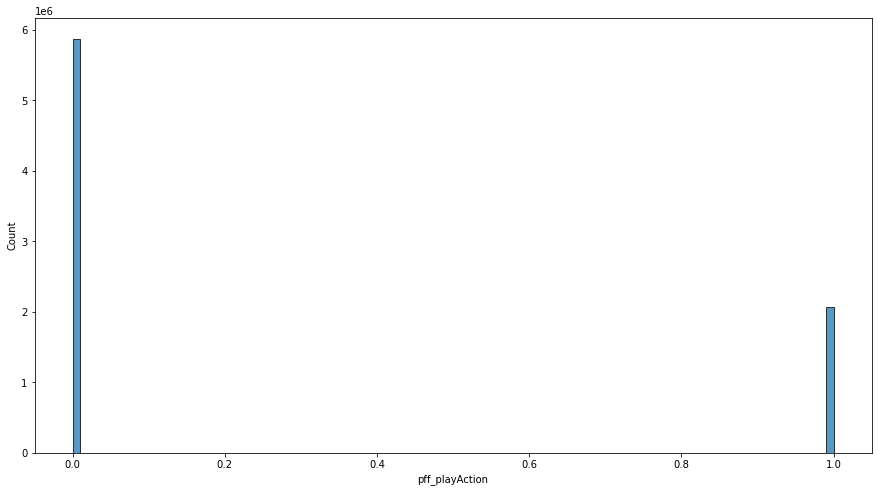

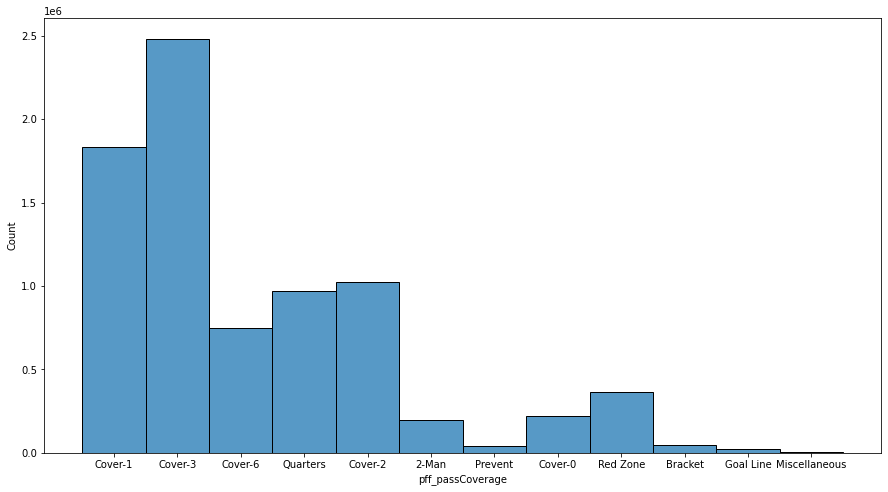

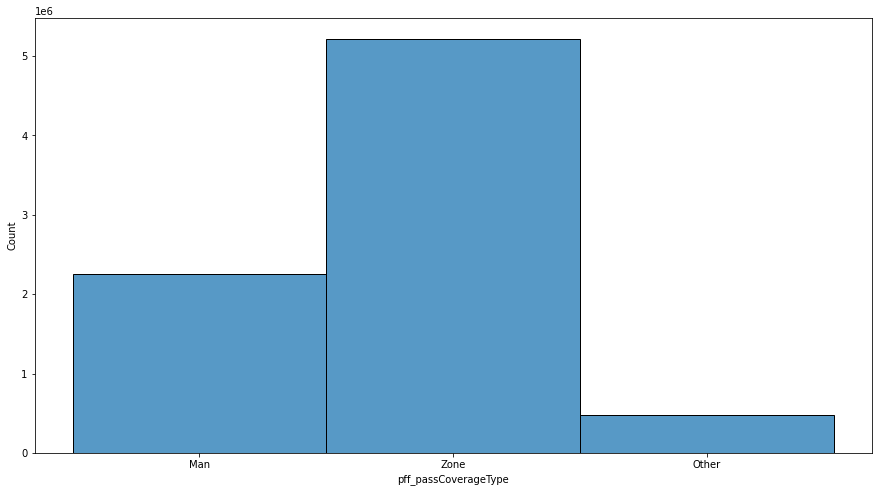

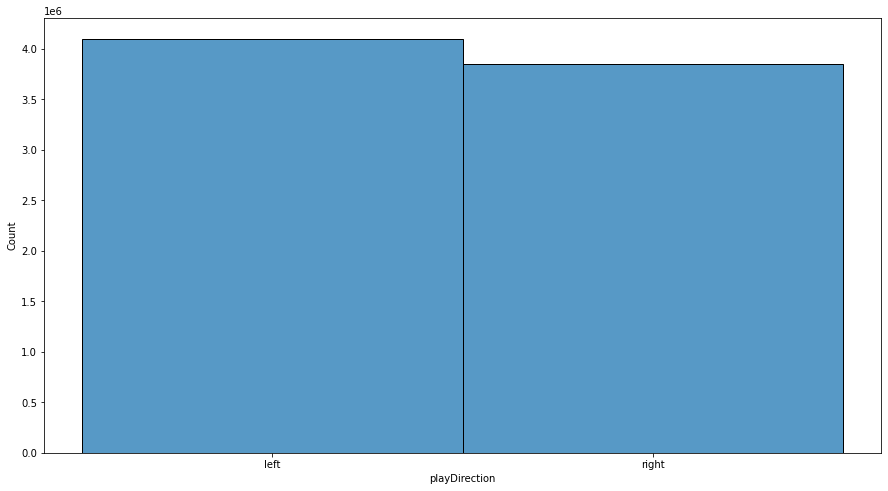

In [34]:
for col in dfnew.columns:
    if dfnew[col].nunique() > 1 and dfnew[col].nunique() <= 15:
        try:
            plt.figure(figsize = (15,8))
            sns.histplot(dfnew[col])
            plt.savefig(f'cat_{col}.png')
        except:
            print(f'Error: cat_{col}.png' )

In [35]:
dfnumbers = df.iloc[::, -8:-1]
dfnumbers.head()

,x,y,s,a,dis,o,dir
0,37.77,24.22,0.29,0.30,0.03,165.16,84.99
1,37.78,24.22,0.23,0.11,0.02,164.33,92.87
2,37.78,24.24,0.16,0.10,0.01,160.24,68.55
3,37.73,24.25,0.15,0.24,0.06,152.13,296.85
4,37.69,24.26,0.25,0.18,0.04,148.33,287.55
